In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [3]:
output_dir = '/mnt/data'
image_set = 'train'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [4]:
dir(coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [18]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# blouse
img_id = 15123905676769761541
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)

15123905676769761541
{'height': 512, 'width': 341, 'file_name': '17b522a66dfc3acb1b8e9bfce063c603.jpg', 'id': 15123905676769761541, 'category': 'blouse'}


In [19]:
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id

/mnt/data/images/blouse/17b522a66dfc3acb1b8e9bfce063c603.jpg


15123905676769761541

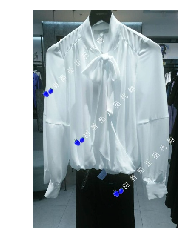

In [20]:
img = cv2.imread(img_path.as_posix())
plt.axis('off')
plt.imshow(img)
plt.show()

In [21]:
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# catIds=coco.getCatIds()
catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

[1]


[{'segmentation': [], 'bbox': [28, 10, 289, 434], 'keypoints': [130, 16, 2, 185, 10, 2, 162, 104, 2, 37, 93, 2, 300, 85, 2, 79, 162, 2, 243, 150, 1, -1, -1, 0, -1, -1, 0, 56, 439, 2, 28, 434, 2, 274, 444, 2, 317, 431, 2, 99, 376, 2, 234, 382, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 15123905676769761541, 'category_id': 1, 'id': 8300001400808172027, 'area': 125426}]


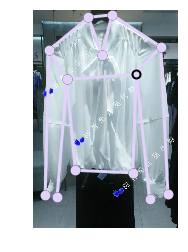

In [22]:
plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

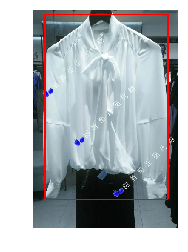

In [23]:
xmin, ymin, width, height = anns[0]['bbox']
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()

10847396333075508021
{'height': 512, 'width': 341, 'file_name': 'b27e2a2c3c765481ce51cc6cd08a3665.jpg', 'id': 10847396333075508021, 'category': 'outwear'}
/mnt/data/images/outwear/b27e2a2c3c765481ce51cc6cd08a3665.jpg
[3]
[{'segmentation': [], 'bbox': [46, 28, 218, 470], 'keypoints': [130, 43, 2, 188, 28, 2, -1, -1, 0, 74, 76, 2, 252, 72, 2, 83, 139, 1, 244, 130, 1, -1, -1, 0, -1, -1, 0, 93, 341, 2, 46, 355, 2, 217, 344, 2, 264, 359, 2, 75, 496, 2, 237, 498, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 10847396333075508021, 'category_id': 3, 'id': 2527354309620643515, 'area': 102460}]


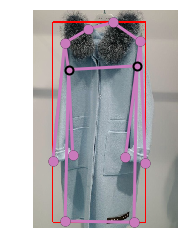

In [32]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# outwear
img_id = 10847396333075508021
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

xmin, ymin, width, height = anns[0]['bbox']
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()

15585969014593709956
{'height': 512, 'width': 512, 'file_name': '4390b25cf2c3d72b8aafdc7302f3d061.jpg', 'id': 15585969014593709956, 'category': 'trousers'}
/mnt/data/images/trousers/4390b25cf2c3d72b8aafdc7302f3d061.jpg
[5]
[{'segmentation': [], 'bbox': [111, 119, 288, 341], 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 149, 119, 2, 368, 124, 2, -1, -1, 0, -1, -1, 0, 258, 302, 2, 221, 460, 2, 111, 440, 2, 285, 457, 2, 399, 443, 2], 'iscrowd': 0, 'image_id': 15585969014593709956, 'category_id': 5, 'id': 4878997679003535991, 'area': 98208}]


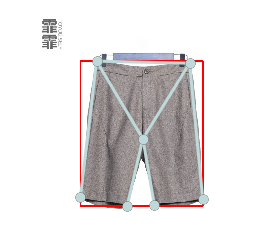

In [36]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# trousers
img_id = 15585969014593709956
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

xmin, ymin, width, height = anns[0]['bbox']
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()

318408857688252298
{'height': 512, 'width': 512, 'file_name': 'ea68e498ed5f5ee8af45d3d7df3eb8c8.jpg', 'id': 318408857688252298, 'category': 'dress'}
/mnt/data/images/dress/ea68e498ed5f5ee8af45d3d7df3eb8c8.jpg
[2]
[{'segmentation': [], 'bbox': [144, 33, 245, 421], 'keypoints': [215, 33, 2, 305, 39, 2, 257, 67, 2, 174, 51, 2, 336, 53, 1, 185, 122, 2, 337, 119, 2, -1, -1, 0, -1, -1, 0, 183, 161, 2, 153, 159, 2, 351, 121, 2, 389, 95, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 144, 454, 2, 375, 454, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 318408857688252298, 'category_id': 2, 'id': 6979519107182035901, 'area': 103145}]


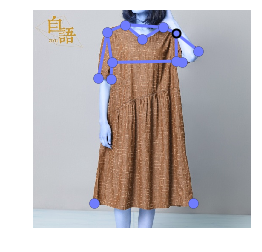

In [52]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# dress
img_id = 318408857688252298
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

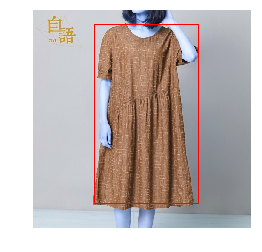

In [47]:
xmin, ymin, width, height = anns[0]['bbox']
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()

12300374081012474623
{'height': 512, 'width': 509, 'file_name': '8237c8c49165ea4e0d51714f50669049.jpg', 'id': 12300374081012474623, 'category': 'skirt'}
/mnt/data/images/skirt/8237c8c49165ea4e0d51714f50669049.jpg
[4]
[{'segmentation': [], 'bbox': [85, 152, 348, 317], 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 137, 154, 2, 354, 152, 2, 85, 469, 2, 433, 463, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 12300374081012474623, 'category_id': 4, 'id': 8986625751350117408, 'area': 110316}]


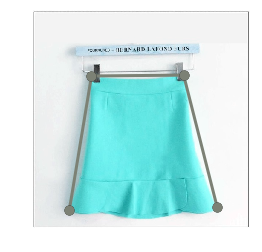

In [55]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# skirt
img_id = 12300374081012474623
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)